In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import plotting
from tblib import sc_AHM

reload(lattice)
reload(hamiltonian)
reload(plotting)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\sc_AHM.py'>

In [37]:
N=2
m = -2
lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, T=0, kind='dDSL', delta=[1,1], U=[1,1], nu=3, ns=[0.3,0.3], mu=[m,m])

In [38]:
dels, nus, mus = sc_AHM.self_consistency_loop(ham, 40, Nmax=200)#ham.Deltra(30,HF=True, alpha=0.7, Nmin=10, Nmax=200)

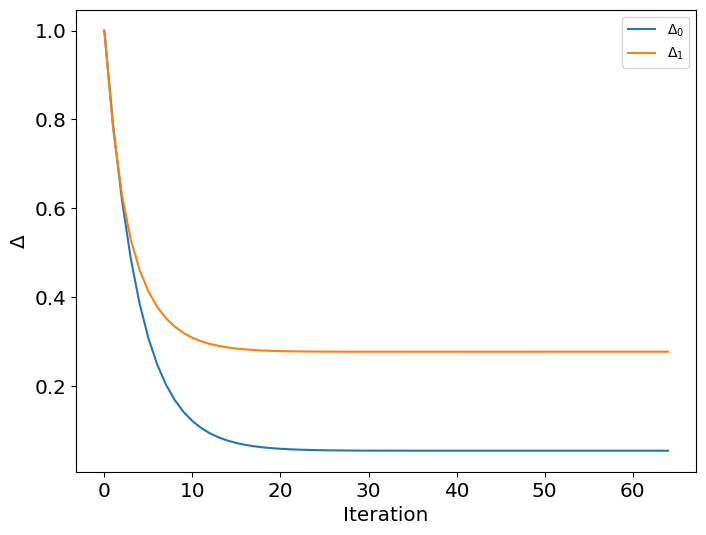

In [39]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

#plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
for i,d in enumerate(dels):
    plt.plot(np.arange(len(dels[0])), np.real(d), label = f'$\Delta_{i}$')
    

plt.legend()

plt.show()

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


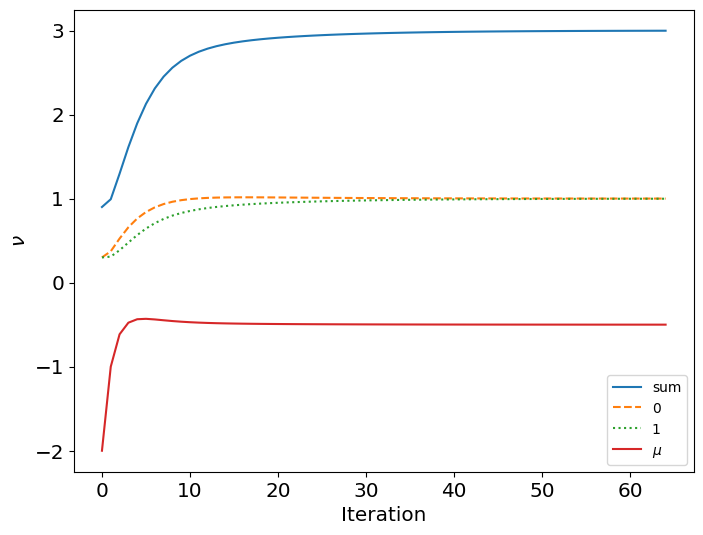

In [40]:
s1 = [np.sum(nus[:,i])+nus[1,i] for i in range(np.shape(nus)[1])]

plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)
colors=['dashed', 'dotted', 'dashdot']
plt.plot(np.arange(len(s1)), s1, label = r'sum')
for i in range(2):
    plt.plot(np.arange(len(s1)),nus[i],linestyle=colors[i], label=f'{i}')
plt.plot(np.arange(len(s1)),mus[0], label=r'$\mu$')

plt.legend()
plt.show()

<AxesSubplot: ylabel='Energy (t)'>

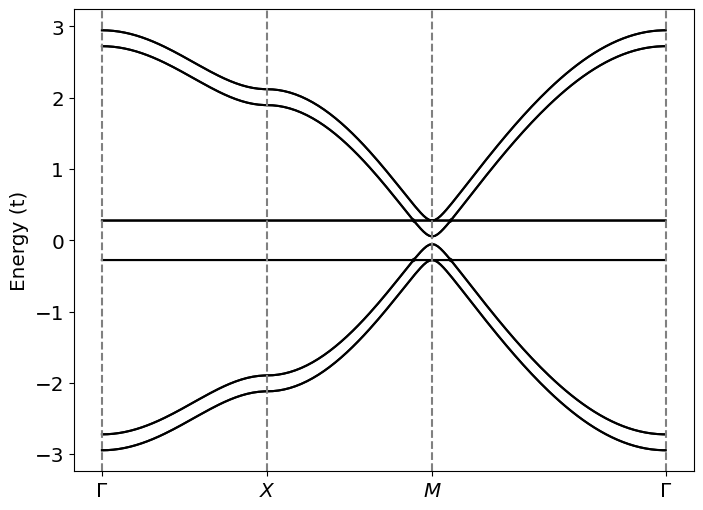

In [41]:
plotting.plot_bands(ham.Hk)

<AxesSubplot: xlabel='DOS', ylabel='Energy (t)'>

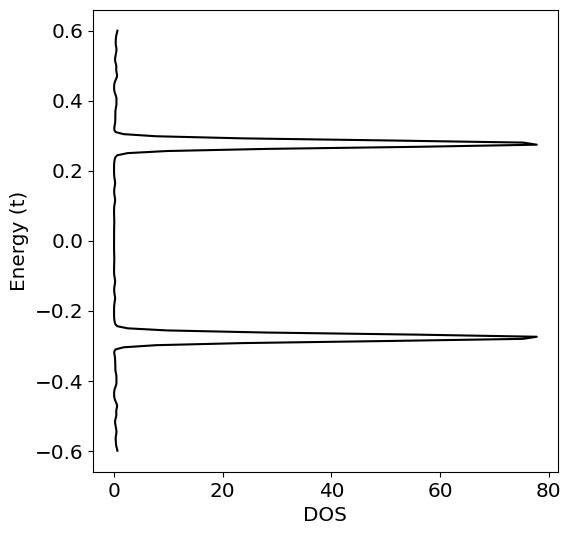

In [44]:
plotting.plot_DOS(ham.Hk, elim=(-0.6,0.6), sig=0.01)